<a href="https://colab.research.google.com/github/Tkag0001/Practice-ML-with-Digit-recognize-problem/blob/main/code/Train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem: Recognizing handwritten digits
Data resources: https://www.kaggle.com/c/digit-recognizer

#Connect to drive:

In [53]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import packages:

In [57]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset:


unzip data

In [ ]:
!unzip '/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/digit-recognizer.zip' -d '/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data'

Archive:  /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/digit-recognizer.zip
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/sample_submission.csv  
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/test.csv  
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/train.csv  


## Note: pls change url to your data folder

In [65]:
train = pd.read_csv('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/test.csv')

In [ ]:
print(f"train size: {train.shape}")
print(f"test size: {test.shape}")

train size: (42000, 785)
test size: (28000, 784)


#Visualize data

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y_train = train['label']
X_train = train.drop(labels=['label'],axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


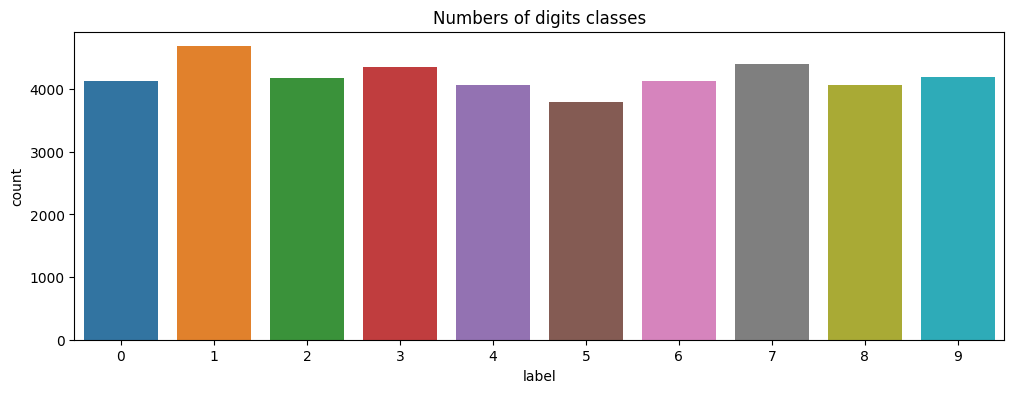

In [67]:
plt.figure(figsize=(12,4))
g = sns.countplot(x=y_train)
plt.title("Numbers of digits classes")
print(y_train.value_counts())
plt.show()

In [ ]:
print(type(y_train[0]))

<class 'numpy.int64'>


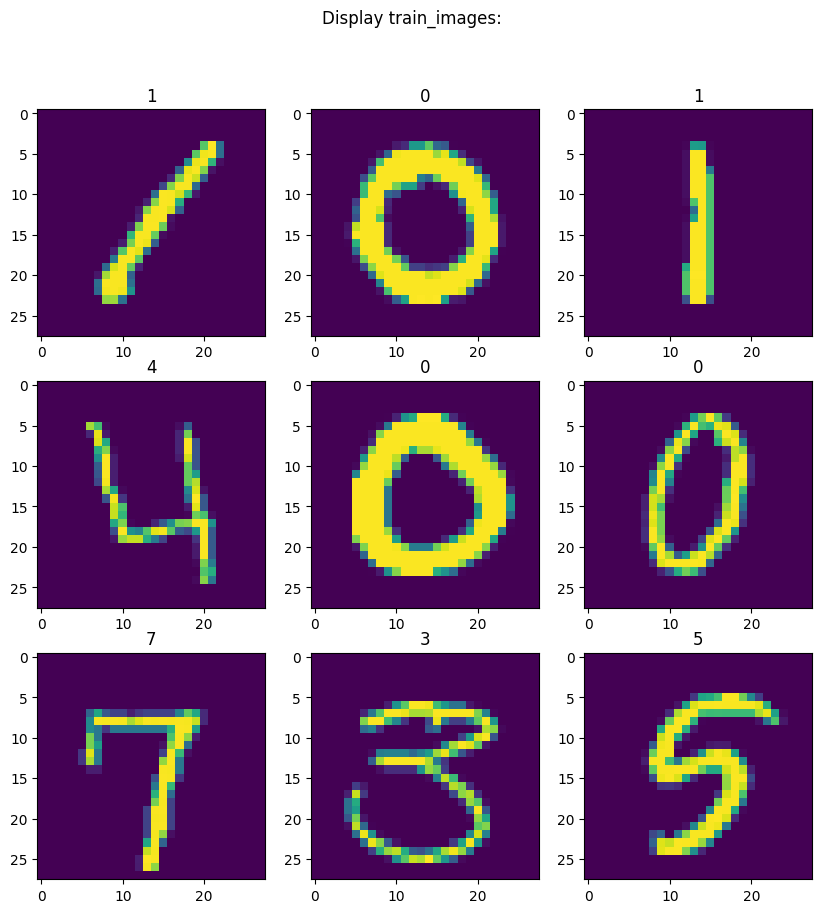

In [68]:
# Display images

fig, axs = plt.subplots(nrows= 3, ncols = 3, figsize = (10,10))
ax = axs.ravel()
for i in range(9):
  data_image = X_train.iloc[i]
  img = data_image.values
  # img = img.as_matrix()
  img = img.reshape((28,28))
  ax[i].imshow(img,aspect="auto")
  # title = y_train[i].astype(str)
  ax[i].set_title(y_train[i])
fig.suptitle("Display train_images:")
plt.show()

#Normalize, Reshape and Label Endcoding:
Why do we have to do them?

##Normalize data:


1.   We normalize data with grayscale to reduce the effect of illumination's differences.
2.   CNN model can work faster when we perform nomalization



In [69]:
X_train = X_train/255.0
test = test/255.0

print(f"X_train shape: {X_train.shape}")
X_train.info()
print(f"\nTest shape: {test.shape}")
test.info()

X_train shape: (42000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 251.2 MB

Test shape: (28000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 167.5 MB


##Reshape data:


1.   Train and test images are currently 2D matrix(28 x 28), we reshape all to 3D matrix(28 x 28 x 1)
2.   Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.



In [70]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (42000, 28, 28, 1)
y_train: (42000,)


##Label Encoding:
Encode labels to one hot vectors

In [71]:
import tensorflow

In [72]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train, num_classes = 10)

In [ ]:
print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


#Train Test split


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size = 0.1,random_state =2)

In [ ]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"\nX_val.shape: {X_val.shape}")
print(f"y_val.shape: {y_val.shape}")


X_train.shape: (37800, 28, 28, 1)
y_train.shape: (37800, 10)

X_val.shape: (4200, 28, 28, 1)
y_val.shape: (4200, 10)


Text(0.5, 0.98, 'Data image')

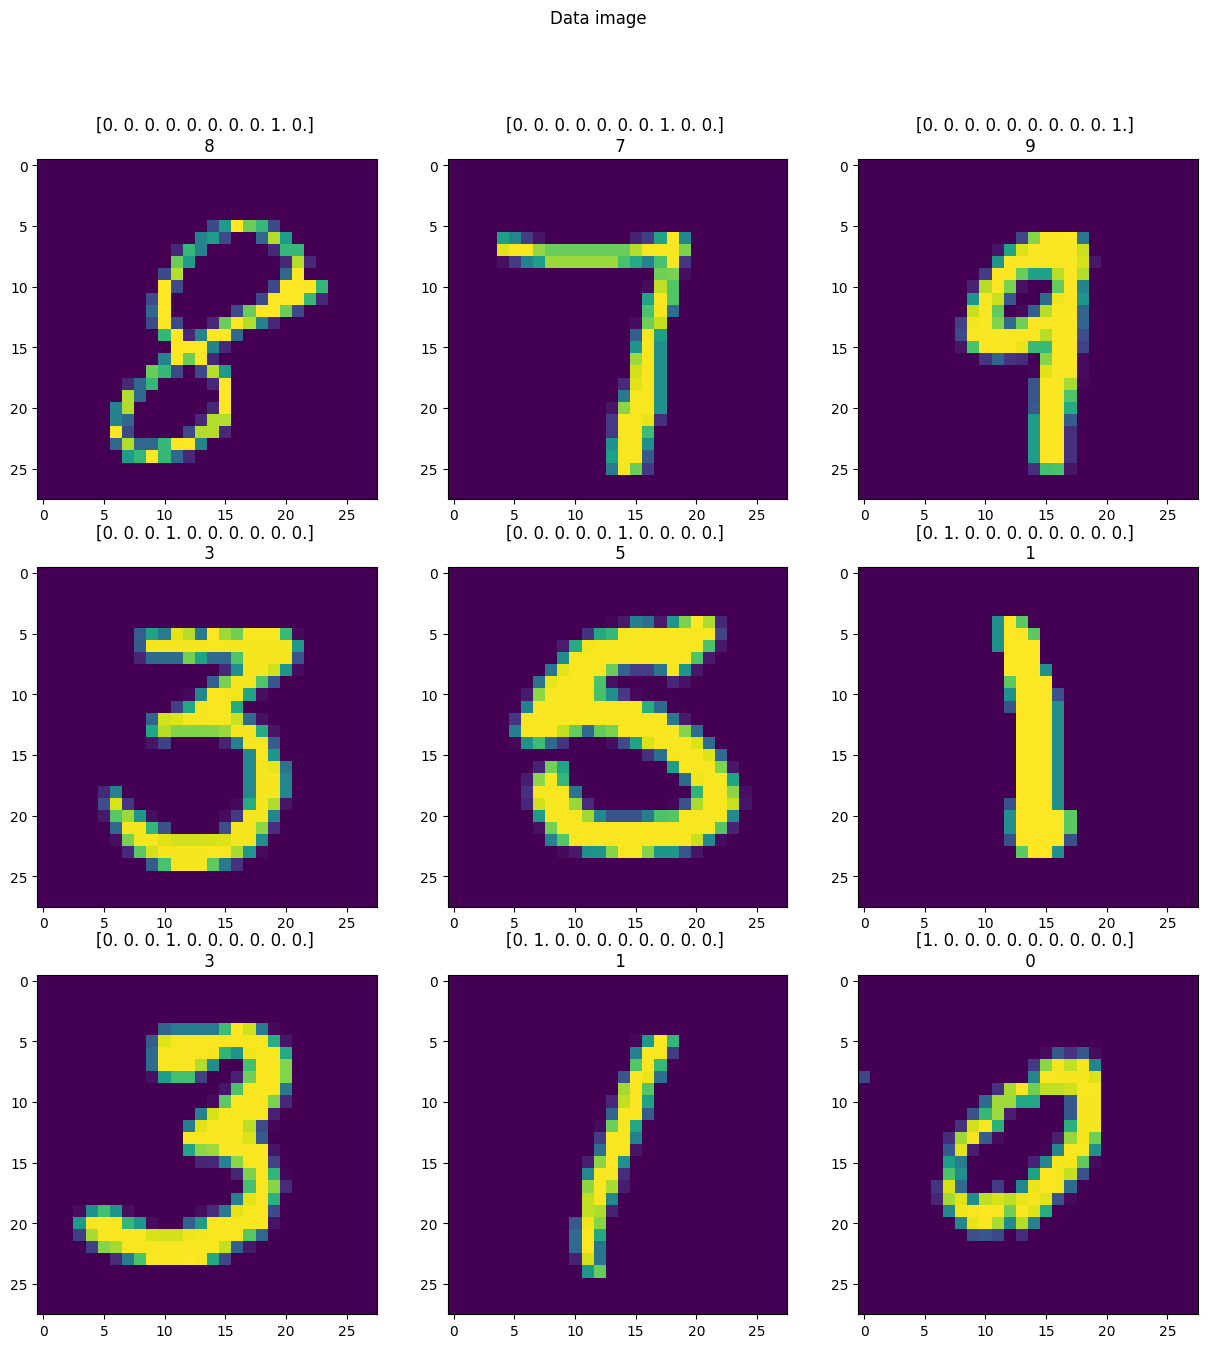

In [74]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(15,15))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(X_train[i][:,:,0])
  axs[i].set_title(f"{y_train[i]} \n {np.argmax(y_train[i])}")
fig.suptitle("Data image")

#Build model:

##Architecture of model:
 Conv2D  --> MaxPool2D --> Drop out --> Conv2D --> MaxPool2D
--> Drop out --> Fully connected(Relu, Softmax)









In [75]:
from sklearn.metrics import confusion_matrix
import itertools

In [76]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

## Create model:

In [83]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size= (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size= (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [84]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [85]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

###Epochs and Batch Size

In [86]:
epochs = 30
batch_size = 128 # 2^x

##Visualize model:

In [113]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 8)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 16)         

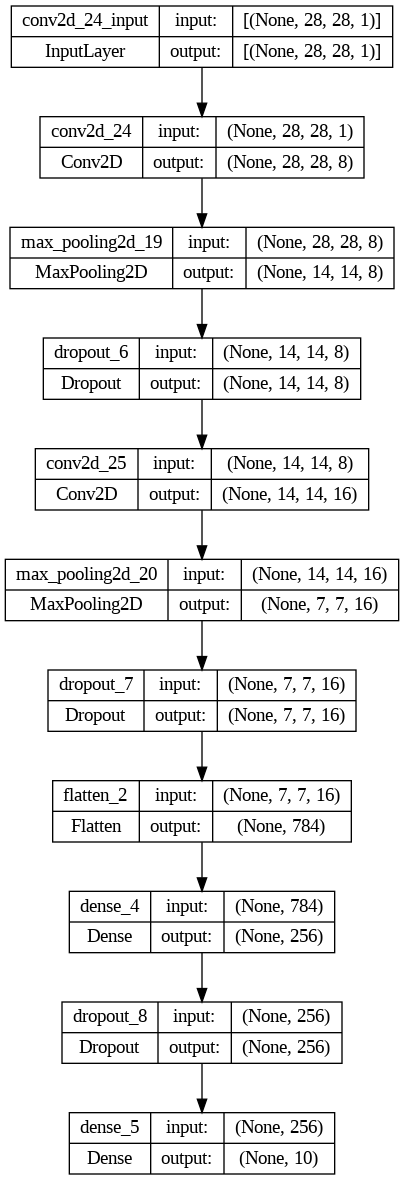

In [114]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'digits_model.png',show_shapes = True)

#Data augmentation:


*   We perform data augmentation to create more data in a lot of situation, then we can avoid overfiting data.
*   Ex: rotate image, zoom, cut, flip, ....
Note that: Don't flip vertically, becaue fliping vertically 6 is 9



In [87]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [ ]:
print(X_train.shape)

(37800, 28, 28, 1)


In [88]:
history1 = model.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),epochs = epochs,
                                validation_data = (X_val,y_val), steps_per_epoch = X_train.shape[0]//batch_size)

Epoch 1/30


<ipython-input-88-33a387a8a4e3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),epochs = epochs,


295/295 [==============================] - 47s 154ms/step - loss: 0.9289 - accuracy: 0.6914 - val_loss: 0.1781 - val_accuracy: 0.9526
Epoch 2/30
295/295 [==============================] - 41s 139ms/step - loss: 0.3745 - accuracy: 0.8812 - val_loss: 0.1106 - val_accuracy: 0.9698
Epoch 3/30
295/295 [==============================] - 41s 139ms/step - loss: 0.2781 - accuracy: 0.9112 - val_loss: 0.0895 - val_accuracy: 0.9721
Epoch 4/30
295/295 [==============================] - 41s 140ms/step - loss: 0.2455 - accuracy: 0.9236 - val_loss: 0.0777 - val_accuracy: 0.9798
Epoch 5/30
295/295 [==============================] - 41s 139ms/step - loss: 0.2150 - accuracy: 0.9336 - val_loss: 0.0669 - val_accuracy: 0.9807
Epoch 6/30
295/295 [==============================] - 41s 139ms/step - loss: 0.1917 - accuracy: 0.9397 - val_loss: 0.0633 - val_accuracy: 0.9810
Epoch 7/30
295/295 [==============================] - 41s 138ms/step - loss: 0.1775 - accuracy: 0.9458 - val_loss: 0.0554 - val_accuracy: 0.9

#Predicted test_data with model:


In [89]:
res1 = model.predict(test)

875/875 [==============================] - 8s 9ms/step


In [91]:
res1 = np.argmax(res1, axis = 1)

Text(0.5, 0.98, 'Result of prediction:')

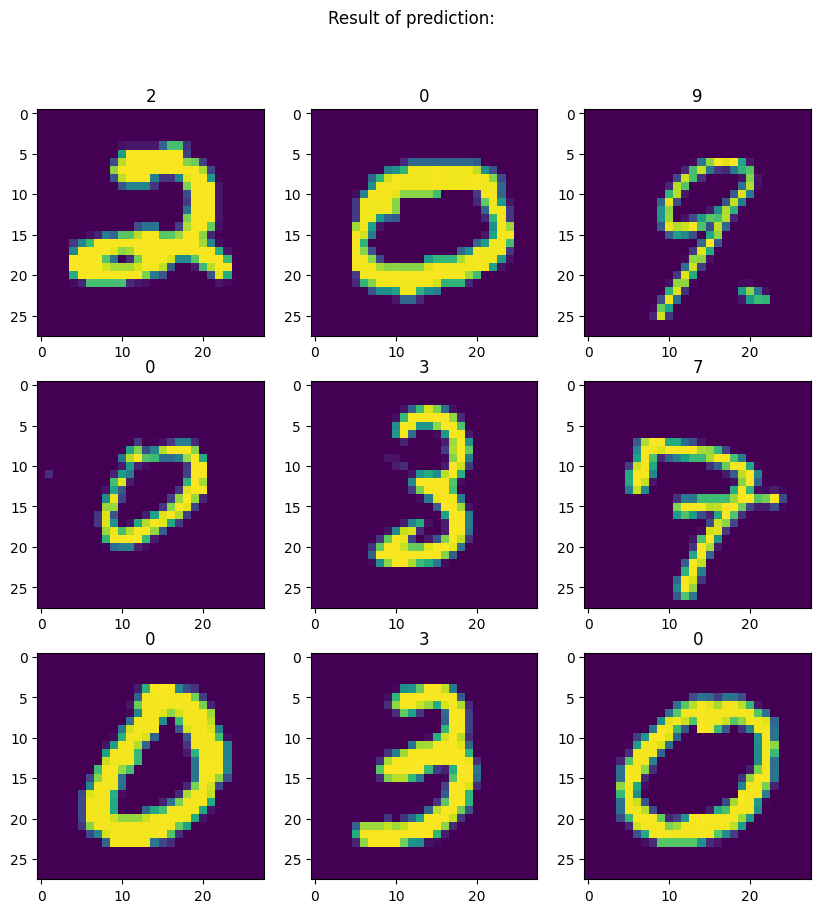

In [92]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(test[i][:,:,0])
  axs[i].set_title(res1[i])
fig.suptitle("Result of prediction:")

##Evaluate model:
We will evaluate this model with loss and accuracy of validation data

In [94]:
history1.history

{'loss': [0.9288575649261475,
  0.3745386302471161,
  0.27814483642578125,
  0.24552257359027863,
  0.2150079905986786,
  0.19165188074111938,
  0.17749331891536713,
  0.17247402667999268,
  0.1616874635219574,
  0.15387365221977234,
  0.15190380811691284,
  0.14177286624908447,
  0.1376694142818451,
  0.13160210847854614,
  0.12716084718704224,
  0.1196446418762207,
  0.12407267838716507,
  0.11904845386743546,
  0.11590486764907837,
  0.1155194640159607,
  0.11303265392780304,
  0.10602803528308868,
  0.10854148119688034,
  0.10670815408229828,
  0.10558877885341644,
  0.10172048211097717,
  0.09964480996131897,
  0.10089172422885895,
  0.0969931036233902,
  0.09682266414165497],
 'accuracy': [0.6914418935775757,
  0.881211519241333,
  0.9112072587013245,
  0.9236037135124207,
  0.9336377382278442,
  0.9397430419921875,
  0.9457952976226807,
  0.9478126764297485,
  0.9497504830360413,
  0.9536791443824768,
  0.953652560710907,
  0.9564397931098938,
  0.9560416340827942,
  0.959970295

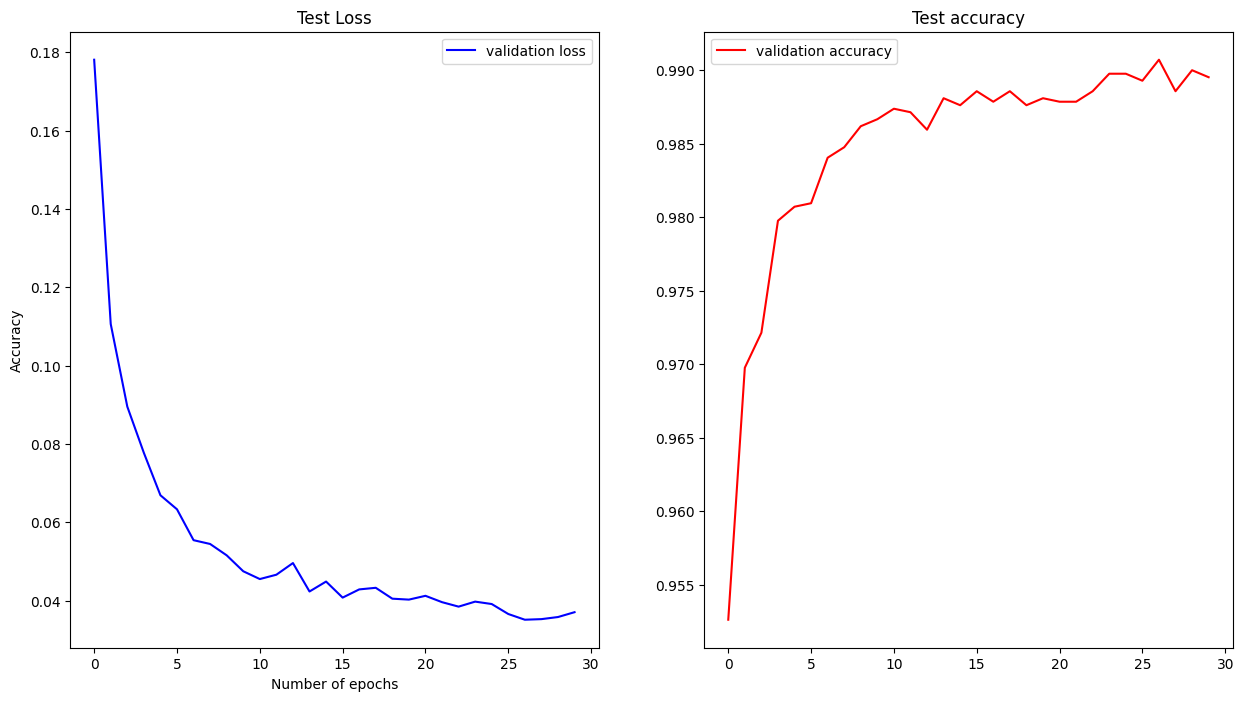

In [100]:
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize=(15,8))
ax = ax.ravel()
#val_loss
ax[0].plot(history1.history['val_loss'],color = 'b',label = 'validation loss')
ax[0].set_title("Test Loss")
ax[0].set(xlabel = "Number of epochs", ylabel = "Loss")
ax[0].legend()

#val_accuracy
ax[1].plot(history1.history['val_accuracy'],color = 'r',label = 'validation accuracy')
ax[1].set_title("Test accuracy")
ax[0].set(xlabel = "Number of epochs", ylabel = "Accuracy")
ax[1].legend()

plt.show()

##Save the model:

In [101]:
#with h5 file
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model1.h5')

Test using saved_model1

In [102]:
saved_model = load_model('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model1.h5')

In [109]:
pre_SMd = saved_model.predict(test)

875/875 [==============================] - 12s 14ms/step


In [110]:
pre_SMd = np.argmax(pre_SMd, axis = 1)

Text(0.5, 0.98, 'Result of prediction:')

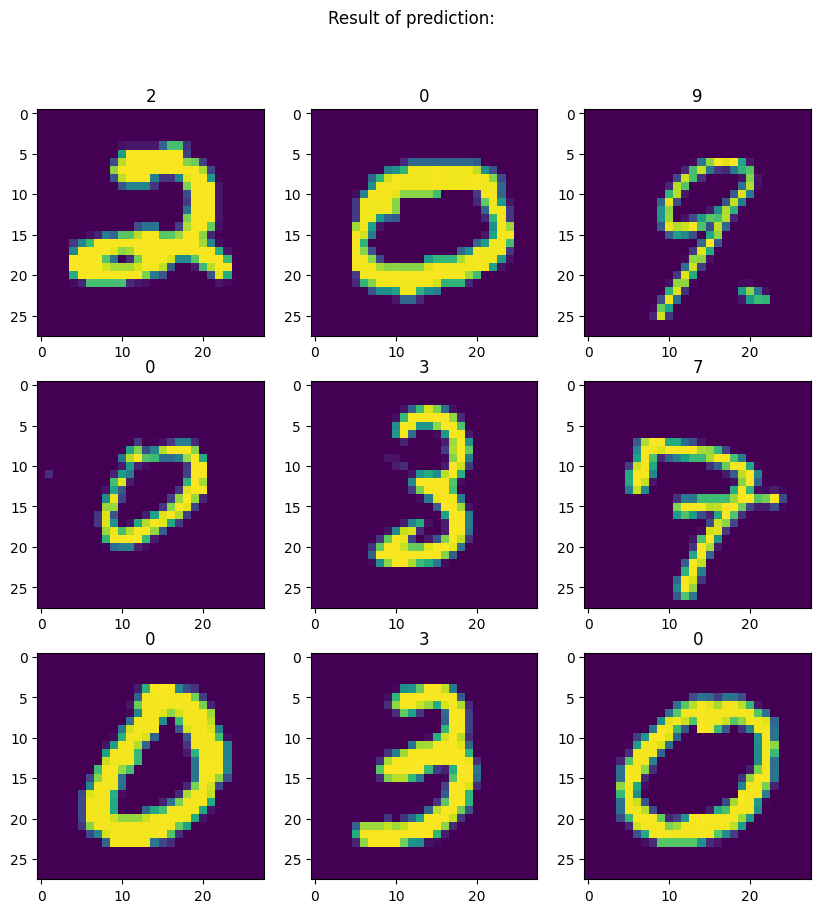

In [111]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(test[i][:,:,0])
  axs[i].set_title(pre_SMd[i])
fig.suptitle("Result of prediction:")

In [112]:
#save model with pickle
import pickle
with open('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model1.pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
#open saved_model with pikle
with open('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model1.pkl','rb') as f:
  saved_md1_pkl = pickle.load(f)

In [ ]:
pre_SMd1_pkl = saved_md1_pkl.predict(test)
pre_SMd1_pkl = np.argmax(pre_SMd1_pkl,axis = 1)
print(pre_SMd1_pkl)

875/875 [==============================] - 10s 11ms/step
[2 0 9 ... 3 9 2]
